In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from data_processing import normalize, new_feats_numeric, split
from plotters import plot_feat_scatter, plot_feat_scatter_all, plot_corr, get_classification_report
from utils import diff, combine_unique

In [2]:
DATA_TRAIN = './data/train.csv'

In [3]:
df_train = pd.read_csv(DATA_TRAIN)

In [4]:
df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [5]:
TARGET_NAME = 'choose'
BASE_FEATURE_NAMES = np.array(list(df_train.columns.drop(['Id', TARGET_NAME])))
NUMERIC_FEATURE_NAMES = df_train.columns.drop(['Id', TARGET_NAME, 'physics', 'chemistry', 'biology', 'english', 'geography', 'history'])

In [6]:
def plots(df, feats = BASE_FEATURE_NAMES):
    plot_feat_scatter_all(df, feats, TARGET_NAME)
    plot_corr(df, feats, TARGET_NAME)

In [7]:
df_train_nf, NEW_FEATURES = new_feats_numeric(df_train, NUMERIC_FEATURE_NAMES)

In [8]:
df_train_nf = normalize(df_train_nf, np.append(BASE_FEATURE_NAMES, NEW_FEATURES))

age:


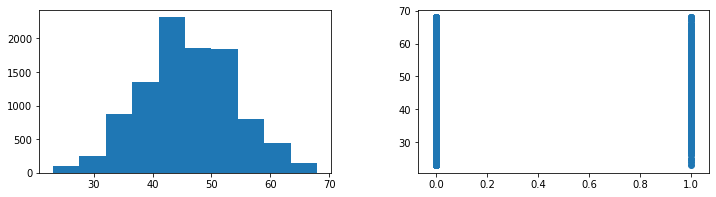

years_of_experience:


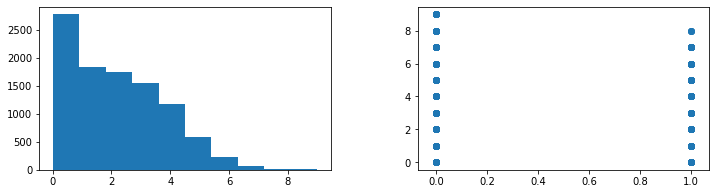

lesson_price:


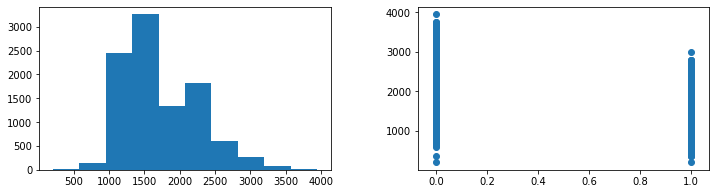

qualification:


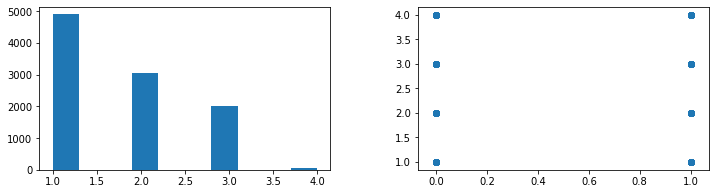

physics:


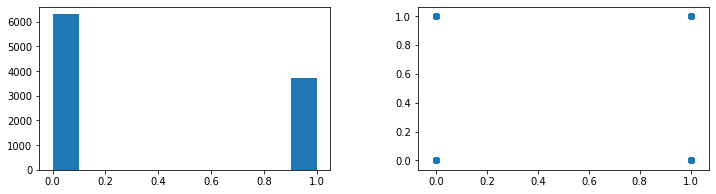

chemistry:


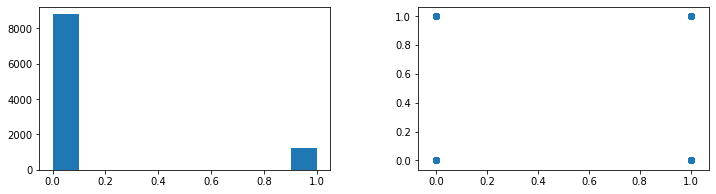

biology:


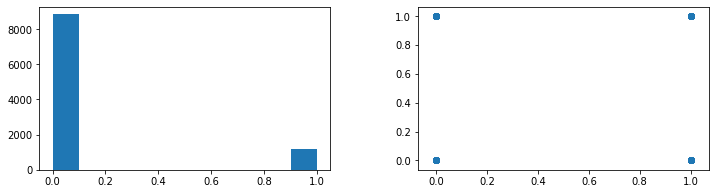

english:


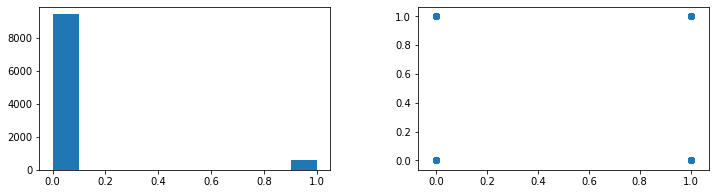

geography:


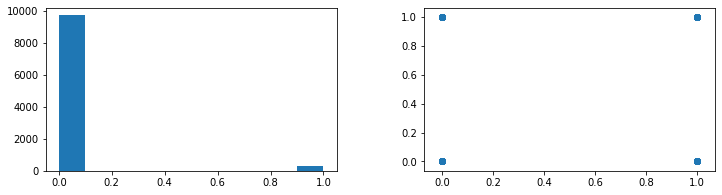

history:


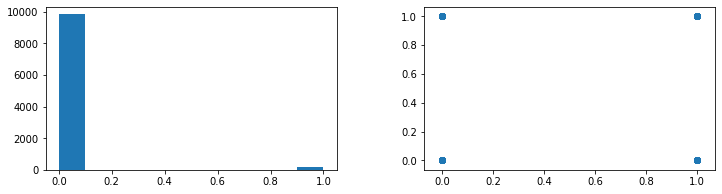

mean_exam_points:


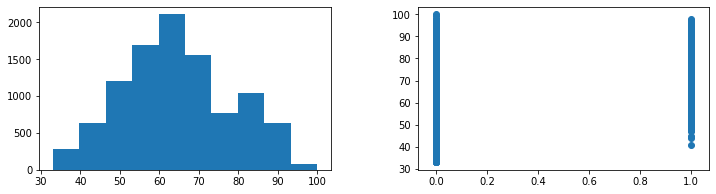

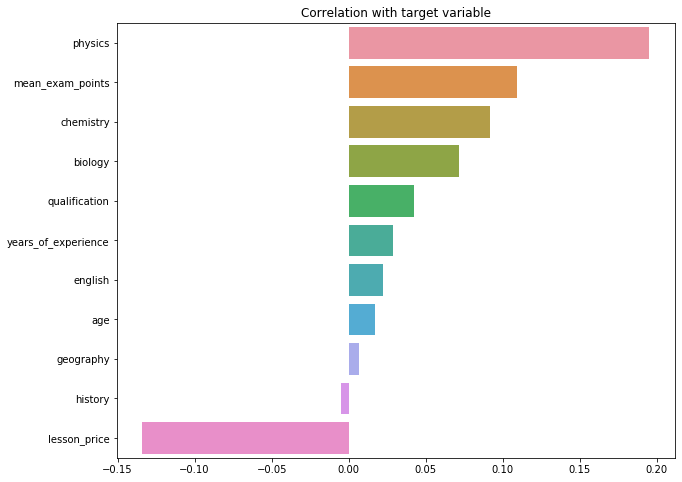

In [9]:
plots(df_train)

sqr_qualification:


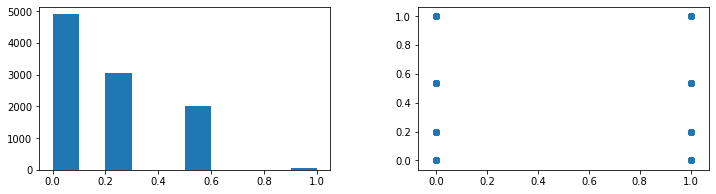

log_qualification:


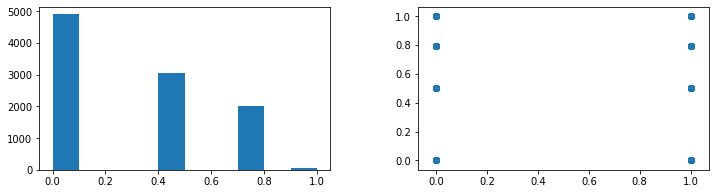

years_of_experience:


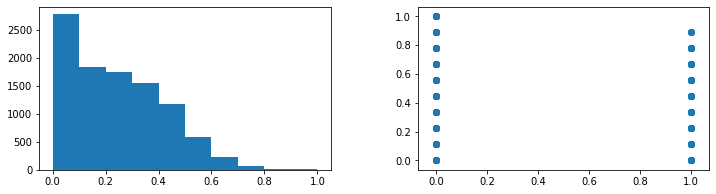

log_lesson_price:


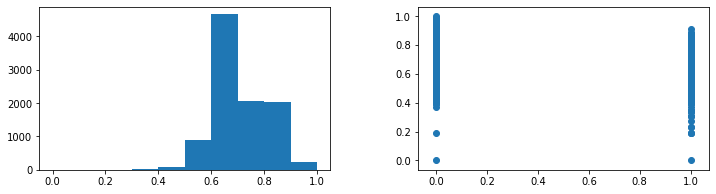

chemistry:


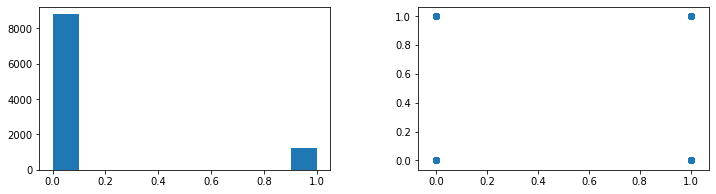

mean_exam_points:


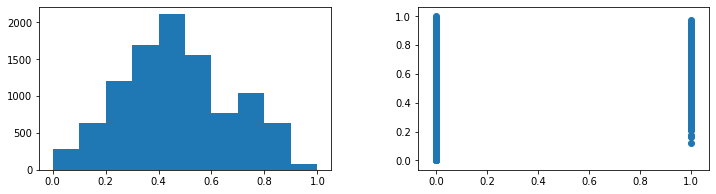

sqrt_mean_exam_points:


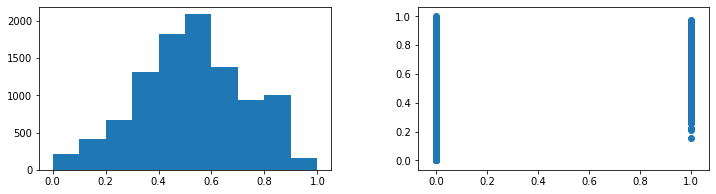

sqrt_lesson_price:


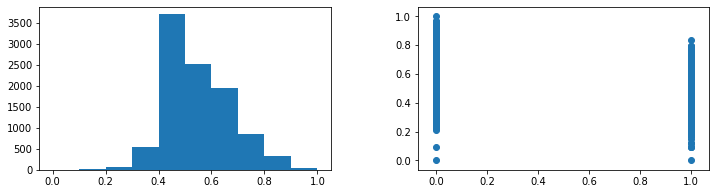

log_mean_exam_points:


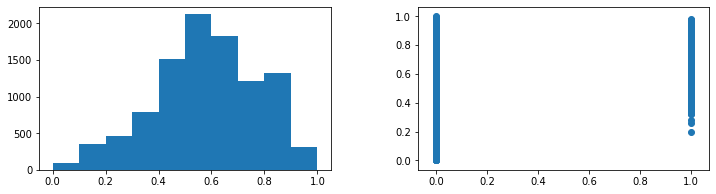

sqrt_years_of_experience:


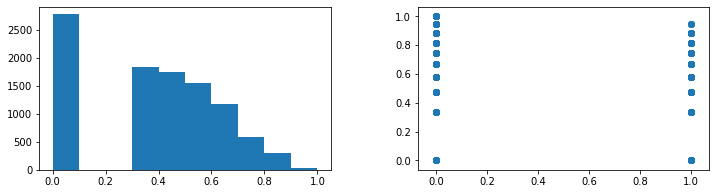

log_years_of_experience:


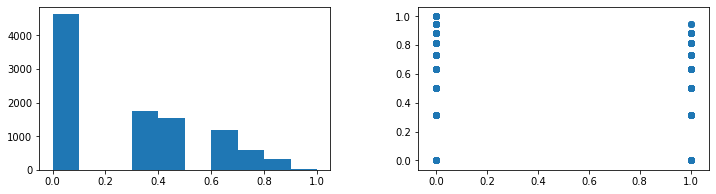

history:


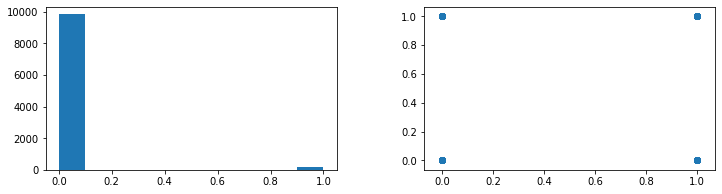

sqr_mean_exam_points:


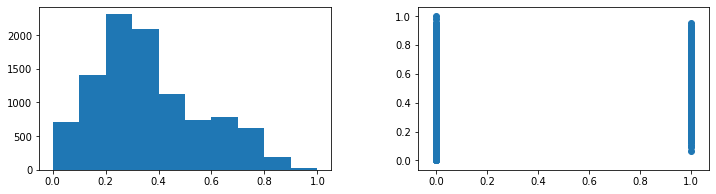

sqrt_qualification:


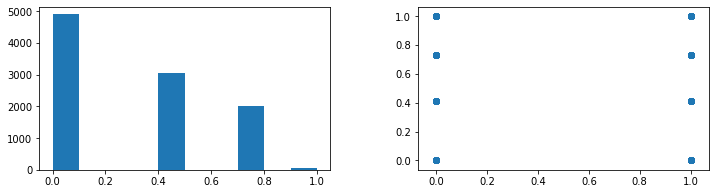

qualification:


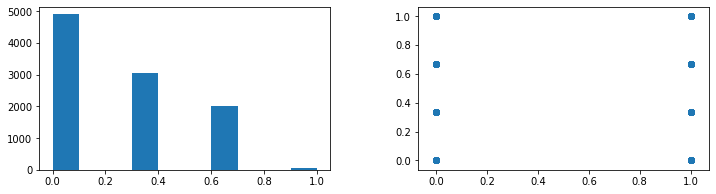

sqrt_age:


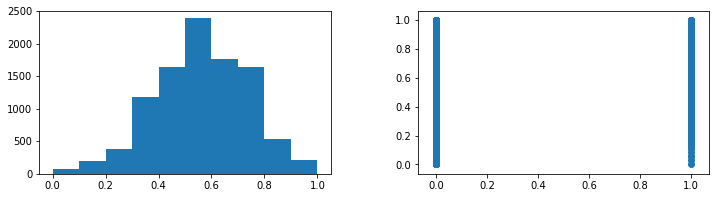

sqr_lesson_price:


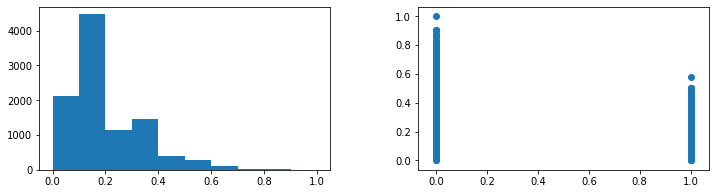

physics:


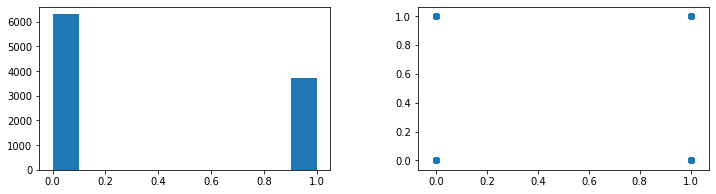

age:


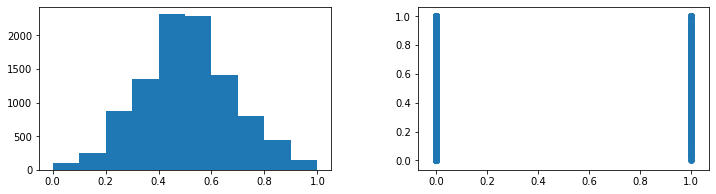

sqr_years_of_experience:


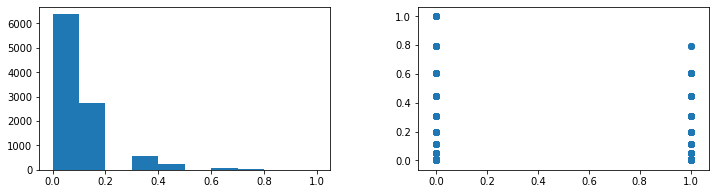

biology:


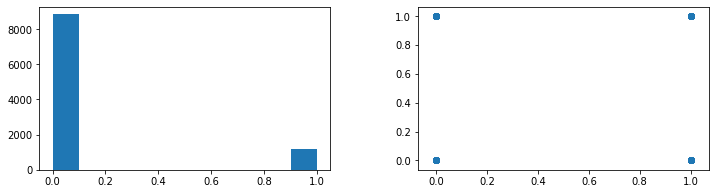

geography:


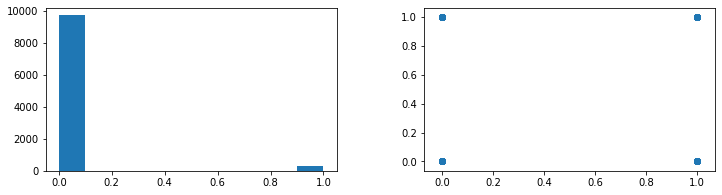

lesson_price:


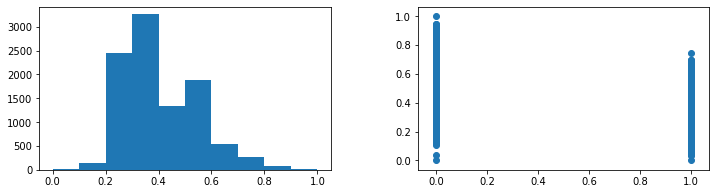

sqr_age:


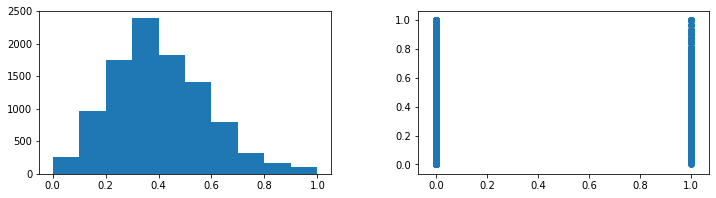

english:


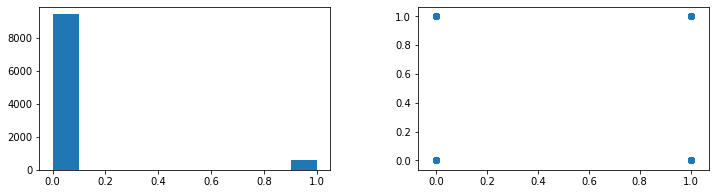

log_age:


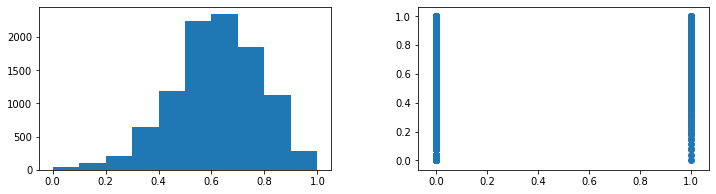

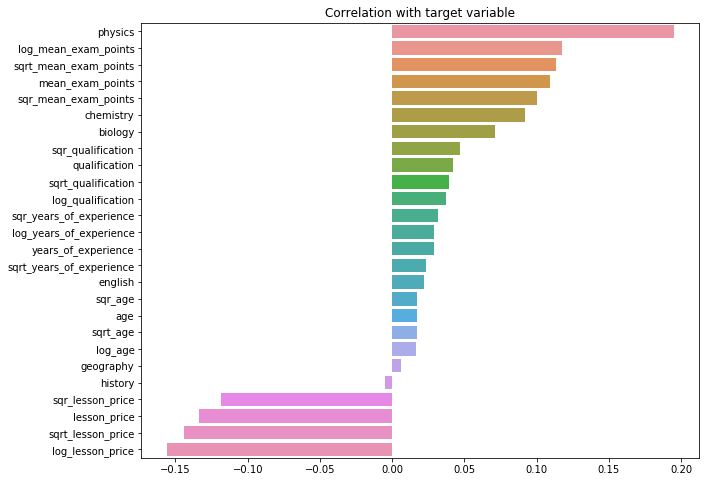

In [10]:
plots(df_train_nf, combine_unique(BASE_FEATURE_NAMES, NEW_FEATURES))

In [11]:
FEAT_TO_GET = [
    'Id',
    'physics', 'chemistry', 'biology',
    'log_mean_exam_points', 'sqr_mean_exam_points',
    'mean_exam_points', 'sqrt_mean_exam_points',
    'sqrt_lesson_price', 'lesson_price', 'sqr_lesson_price', 'log_lesson_price',
    'choose'
]
FEAT_TO_GET = df_train_nf.columns.values

In [12]:
df_train_nf[FEAT_TO_GET].to_csv('./data/trainnf.csv', index=False)

**тест данные**

In [13]:
DATA_TEST = './data/test.csv'
df_test = pd.read_csv(DATA_TEST)

In [14]:
df_test_nf, NEW_FEATURES = new_feats_numeric(df_test, NUMERIC_FEATURE_NAMES)
df_test_nf = normalize(df_test_nf, np.append(BASE_FEATURE_NAMES, NEW_FEATURES))
df_test_nf[diff(FEAT_TO_GET, ['choose'])].to_csv('./data/testnf.csv', index=False)